## **Bài 1:**

### **1.1.**

In [51]:
import numpy as np
import matplotlib.pyplot as plt

In [52]:
def mean_normalization(X):
    N = len(X)
    max_i = np.max(X)
    min_i = np.min(X)
    avg = np.mean(X)
    X = (X - avg) / (max_i - min_i)
    # column stack 1 for first column - represents bias
    X_b = np.c_[np.ones((N, 1)), X]
    
    return X_b, max_i, min_i, avg
    

data = np.genfromtxt(
    "Module_4\\Week_2\\advertising.csv",
    delimiter=",",
    skip_header=1
)
N = data.shape[0]
X = data[:, :3]
y = data[:, 3:]
X_b, max_i, min_i, avg = mean_normalization(X)

In [60]:
def stochastic_gradient_descent(X_b, y, n_epochs=50, lr=1e-5):
    # thetas = np.random.rand(4, 1)  # uncomment this for real application
    thetas = np.asarray([[1.16270837], 
                         [-0.81960489],
                         [1.39501033], 
                         [0.29763545]])
    
    thetas_path = [thetas]
    losses = []
    
    for epoch in range(n_epochs):
        for i in range(N):
            # select random number in N
            # random_index = np.random.randint(N)  # uncomment this for real application
            random_index = i  # use for assignment only
            
            x_i = X_b[random_index:random_index+1]  # 1x4
            y_i = y[random_index:random_index+1]  # 1x1
            
            # Compute output
            # y_i_hat = np.matmul(x_i, thetas)  # 1x4 * 4x1 = 1x1 
            y_i_hat = x_i.dot(thetas)
            
            # Compute loss loss_i
            loss_i = (y_i_hat - y_i) ** 2 / 2  # 1x1
            
            # Compute gradient for loss
            dl_dy = (y_i_hat - y_i)  # 1x1
            
            # Compute gradient
            dl_dthetas = x_i.T.dot(dl_dy)  # scalar * 4x1 = 4x1
            
            # Update thetas
            thetas = thetas - lr * dl_dthetas  # 4x1 - 4x1 = 4x1
            
            # Logging
            thetas_path.append(thetas)
            losses.append(loss_i.item())
            
    return thetas_path, losses
    
sgd_theta, losses = stochastic_gradient_descent(X_b, y, n_epochs=50, lr=0.01)

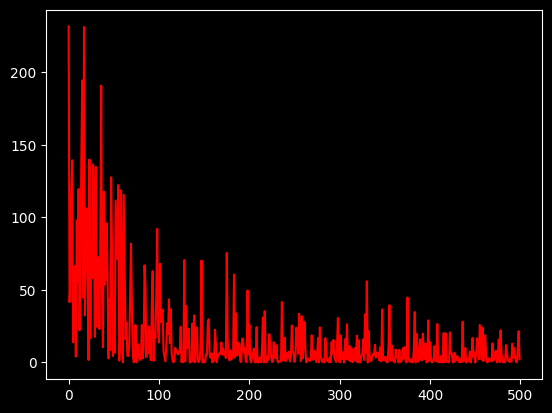

In [61]:
x_axis = list(range(500))
plt.plot(x_axis, losses[:500], color="r")
plt.show()

In [63]:
# Cau 1: C?
sgd_theta, losses = stochastic_gradient_descent(X_b, y, n_epochs=1, lr=0.01)
print(np.sum(losses))

6754.643359356192


### **1.2.**

In [67]:
def mini_batch_gradient_descent(X_b, y, n_epochs=50, minibatch_size=20, lr=1e-2):
    # thetas = np.random.randn(4, 1)  # uncomment for real application
    thetas = np.asarray([[1.16270837], [-0.81960489], [1.39501033], [0.29763545]])
    
    thetas_path = [thetas]
    losses = []
    
    for epoch in range(n_epochs):
        # shuffled_indices = np.random.permutation(N)  # uncomment for real application
        shuffled_indices = np.asarray([
            21, 144, 17, 107, 37, 115, 167, 31, 3, 132, 179, 155, 36, 191, 182, 170, 
            27, 35, 162, 25, 28, 73, 172, 152, 102, 16, 185, 11, 1, 34, 177, 29, 96, 
            22, 76, 196, 6, 128, 114, 117, 111, 43, 57, 126, 165, 78, 151, 104, 110, 
            53, 181, 113, 173, 75, 23, 161, 85, 94, 18, 148, 190, 169, 149, 79, 138, 
            20, 108, 137, 93, 192, 198, 153, 4, 45, 164, 26, 8, 131, 77, 80, 130, 127, 
            125, 61, 10, 175, 143, 87, 33, 50, 54, 97, 9, 84, 188, 139, 195, 72, 64, 
            194, 44, 109, 112, 60, 86, 90, 140, 171, 59, 199, 105, 41, 147, 92, 52, 
            124, 71, 197, 163, 98, 189, 103, 51, 39, 180, 74, 145, 118, 38, 47, 174, 
            100, 184, 183, 160, 69, 91, 82, 42, 89, 81, 186, 136, 63, 157, 46, 67, 
            129, 120, 116, 32, 19, 187, 70, 141, 146, 15, 58, 119, 12, 95, 0, 40, 83, 
            24, 168, 150, 178, 49, 159, 7, 193, 48, 30, 14, 121, 5, 142, 65, 176, 101, 
            55, 133, 13, 106, 66, 99, 68, 135, 158, 88, 62, 166, 156, 2, 134, 56, 123, 
            122, 154
        ])
        X_b_shuffled = X_b[shuffled_indices]
        y_shuffled = y[shuffled_indices]
        
        for i in range(0, N, minibatch_size):
            x_i = X_b_shuffled[i:i+minibatch_size]  # 20x4
            y_i = y_shuffled[i:i+minibatch_size]  # 20x1
            
            # Compute output
            y_hat = np.matmul(x_i, thetas)  # 20x4 * 4x1 = 20x1
            
            # Compute loss
            loss = (y_hat - y_i) ** 2 / 2  # MSE 20x1
            
            # Compute gradient of loss
            gradient_loss = (y_hat - y_i) / minibatch_size # 20x1
            
            # Compute gradient of params
            gradients = np.matmul(x_i.T, gradient_loss) # 4x20 * 20x1 = 4x1
            
            # Update params
            thetas = thetas - lr * gradients  # 4x1
            thetas_path.append(thetas)

            mean_loss = np.sum(loss) / minibatch_size
            losses.append(mean_loss)
            
    return thetas_path, losses

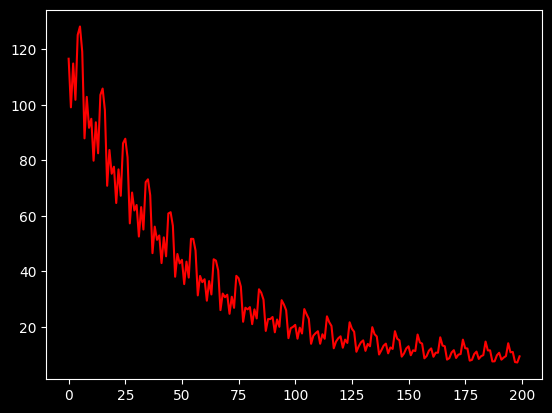

In [68]:
mbgd_thetas, losses = mini_batch_gradient_descent(X_b, y, n_epochs=50, minibatch_size=20, lr=0.01)

x_axis = list(range(200))
plt.plot(x_axis, losses[:200], color="r")
plt.show()

In [69]:
# Cau 2: 11k?
mbgd_thetas, losses = mini_batch_gradient_descent(X_b, y, n_epochs=50, minibatch_size=20, lr=0.01)
print(round(sum(losses), 2))

8865.65


### **1.3.**

In [70]:
def batch_gradient_descent(X_b, y, n_epochs=100, lr=0.01):
    # thetas = np.random.randn(4, 1)  # uncomment for real application
    thetas = np.asarray([[1.16270837], [-0.81960489], [1.39501033], [0.29763545]])
    
    thetas_path = [thetas]
    losses = []
    
    for epoch in range(n_epochs):
        # Compute output 
        y_hat = np.matmul(X_b, thetas)  # 200x4 * 4x1 = 200x1
        
        # Compute loss
        loss = (y_hat - y) ** 2  # 200x1
        
        # Compute gradient loss
        gradient_loss = 2 * (y_hat - y) / N  # 200x1
        
        # Compute gradient params
        gradients = np.matmul(X_b.T, gradient_loss)  # 4x200 * 200x1 = 4x1
        
        # Update params 
        thetas = thetas - lr * gradients  # 4x1
        thetas_path.append(thetas)
        
        mean_loss = np.sum(loss) / N
        losses.append(mean_loss)
        
    return thetas_path, losses

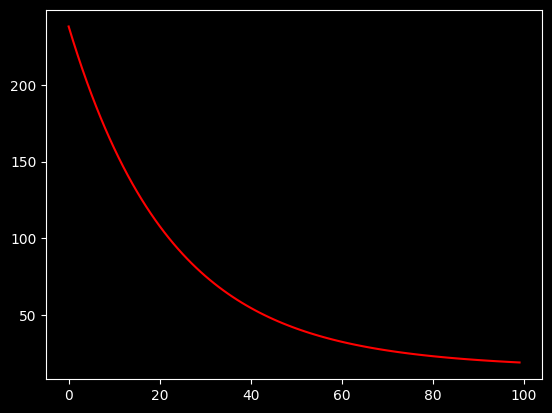

In [71]:
bgd_thetas, losses = batch_gradient_descent(X_b, y, n_epochs=100, lr=0.01)

x_axis = list(range(100))
plt.plot(x_axis, losses[:100], color="r")
plt.show()

In [50]:
# Cau 3: C
bgd_thetas, losses = batch_gradient_descent(X_b, y, n_epochs=100, lr=0.01)
print(round(sum(losses), 2))

6716.46
